Firstly What is Autoregressive Model (AR)

In statistics, econometrics and signal processing, an autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, behavior, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation (or recurrence relation which should not be confused with differential equation). Together with the moving-average (MA) model, it is a special case and key component of the more general autoregressive–moving-average (ARMA) and autoregressive integrated moving average (ARIMA) models of time series, which have a more complicated stochastic structure; it is also a special case of the vector autoregressive model (VAR), which consists of a system of more than one interlocking stochastic difference equation in more than one evolving random variable.

https://en.wikipedia.org/wiki/Autoregressive_model

In [1]:
# Simulate an AR process

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.signal import spectrogram

In [3]:
N = 200

for i in range(N):
    x[i] = alpha[0]*x[i-1] + alpha[1]*x[i-1] + np.random.randn()

NameError: name 'alpha' is not defined

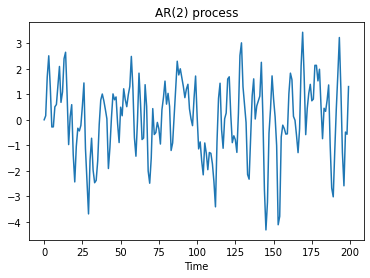

In [4]:
alpha = np.array([-.6,.9])
N = 200
k = len(alpha)
x = np.zeros(N)

for i in range(k,N):
    x[i] = sum(alpha*x[i-k:i]) + np.random.randn()
    
x += np.sin(np.linspace(0,10*np.pi,N))
    
plt.plot(x)
plt.xlabel('Time')
plt.title('AR(%s) process'%k)

plt.show()

In [5]:
# Fourier Transform Coding from scratch

PseudoCode for FT

loop over N points / frequencies (looping index f)
    
    create complex sine wave with length of
    signal, and frequency of looping index.
    
    Compute dot product between complex sine wave and signal
    
Amplitude is magnitude of Fourier coefficients
Phase is angle of Fourier coefficients


In [6]:
# define out time vector
t = np.arange(N)/N

# initialize Fourier Coefficients

fourier_coefficient = np.zeros(N, dtype=complex)

# Manual Fourier Transform

for f in range(N):
    
    # 1) create the complex sine wave
    complex_sine_wave = np.exp(-1j*2*np.pi*f*t)  # 1j gives us square root of minus one
    
    # 2) dot product between the sine wave and the signal
    fourier_coefficient[f] = np.dot(complex_sine_wave,x) 

In [7]:
fourier_coefficient

array([  7.83110404+0.00000000e+00j,  13.99952577+7.78993583e-01j,
        16.63425524+3.75948113e+01j,  19.52973529+4.84274401e+00j,
        -6.62909327+3.66835537e+00j,  -0.78316782-9.47585377e+01j,
       -11.04498565+2.37832092e+00j,   9.42658405-2.15113652e+01j,
        -6.9122507 +1.01486181e+01j,  -4.66506148-8.15598256e+00j,
        20.9233123 +1.45083320e+01j,  -0.56685849-2.33119369e+00j,
       -15.06589302+9.26773116e+00j, -15.14280371+1.45063015e+01j,
        -4.80903909+7.73214425e+00j,   5.70569192+1.63379984e+01j,
        23.12088612-2.63768304e+01j,   4.55376418+6.78091787e-01j,
       -22.88216671-2.31758797e+01j,  -9.78089278-6.73542701e+01j,
        26.57903562+1.15769067e+01j, -18.38102578+1.61540509e+01j,
       -10.59148413-2.18805516e+01j,   5.75555854-4.14186776e+01j,
        -1.95256346+3.74838282e+00j,  31.17212155-1.50827502e+01j,
        21.33811846-1.10571302e+01j,  13.00935801-1.77869217e+01j,
        37.93810984+3.75064954e+00j, -39.38875706+3.48443487e+

In [8]:
# FFT function

fourier_coefficient_2 = np.fft.fft(x)

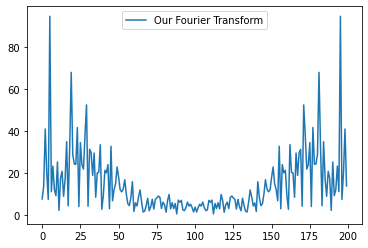

In [9]:
plt.plot(np.abs(fourier_coefficient), label= 'Our Fourier Transform')
plt.legend()
plt.show()

In [10]:
# The graph above contain negatif and positive frequencies. We need just positive ones

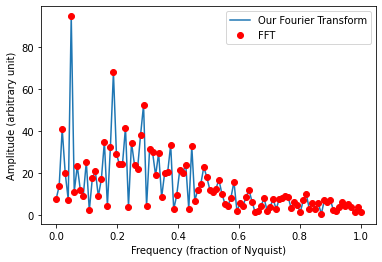

In [11]:
hz = np.linspace(0,1,int(N/2 +2))

plt.plot(hz,np.abs(fourier_coefficient[:len(hz)]), label= 'Our Fourier Transform')
plt.plot(hz,np.abs(fourier_coefficient_2[:len(hz)]),'ro', label ='FFT')
plt.legend()
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (arbitrary unit)')
plt.show()

In [12]:
# Zero - padding the FFT

In [13]:
# Zero padding means to pad your time series signal with zeros.
# Why would I pad times series signal with zeros before taking Fourier Transform?

# ===> it is smooth out the signal representation in frequency domain.

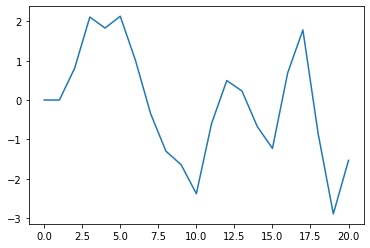

In [14]:
alpha = np.array([-.6,.9])
N = 21
k = len(alpha)
x = np.zeros(N)

for i in range(k,N):
    x[i] = sum(alpha*x[i-k:i]) + np.random.randn()
    
plt.plot(x)

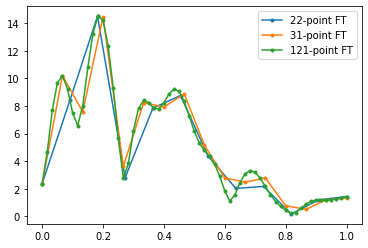

In [15]:
for i in range(3):
    # specify the number of FFT points (including zero padding)
    nfft =N + 10**i
    
    # compute the FFT
    xX = np.fft.fft(x, n=nfft)
     
    # compute the hz vector
    hz = np.linspace(0, 1, int(nfft/2 +1))
    
    # plot the amplitude spectrum
    plt.plot(hz,np.abs(xX[:len(hz)]),'.-', label = '%s-point FT'%nfft)
    
    
plt.legend() 
plt.show()

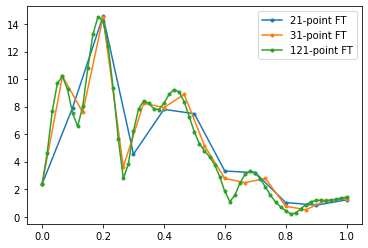

In [16]:
for i in range(3):
    # specify the number of FFT points (including zero padding)
    nfft =N + 10**i * int(i!=0)
    
    # compute the FFT
    xX = np.fft.fft(x, n=nfft)
     
    # compute the hz vector
    hz = np.linspace(0, 1, int(nfft/2 +1))
    
    # plot the amplitude spectrum
    plt.plot(hz,np.abs(xX[:len(hz)]),'.-', label = '%s-point FT'%nfft)
    
    
plt.legend() 
plt.show()

In [17]:
for i in range(3):
    print(int(i!=0))

0
1
1


In [18]:
# Welch's Method

# The idea of Welches method is to deal with signals that are non stationary signals that change
# a lot in their characteristic over time, like what you see with this kind of a signal.

# Welch's method take repeated Fourier transforms of little segments of the signal and then average 
# all the individual spectra together

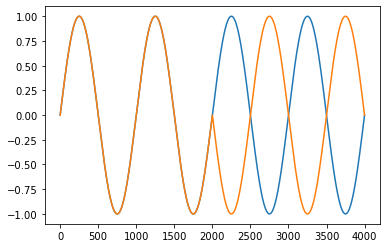

In [19]:
N = 2000
t = np.linspace(0, 4*np.pi, N)

signal1 = np.concatenate((np.sin(t), np.sin(t)))
signal2 = np.concatenate((np.sin(t), -np.sin(t)))                        
                         
plt.plot(signal1)
plt.plot(signal2)
plt.show()

Text(0.5, 1.0, "Dynamic spectrum via Welch's")

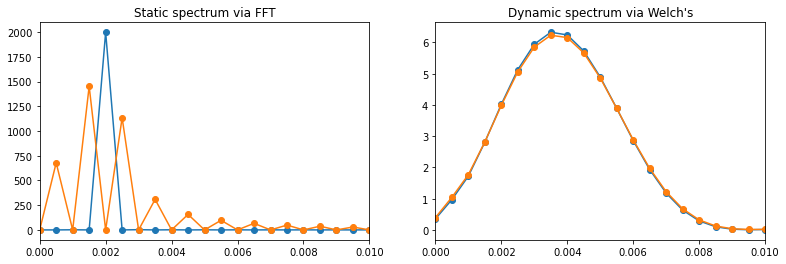

In [20]:
# "Static" FFT

staticX1 = np.fft.fft(signal1)
staticX2 = np.fft.fft(signal2)
staticHz = np.linspace(0,1,int(len(signal1)/2 +1))

# Welch's method
dynamicHz, dynamic1 = welch(signal1, nfft=N)
dynamicHz, dynamic2 = welch(signal2, nfft=N)

fig, ax = plt.subplots(1,2, figsize= (13,4))

ax[0].plot(staticHz,np.abs(staticX1[:len(staticHz)]),'-o', label='Signal 1')
ax[0].plot(staticHz,np.abs(staticX2[:len(staticHz)]),'-o', label='Signal 2')
ax[0].set_xlim([0,.01])
ax[0].set_title('Static spectrum via FFT')

ax[1].plot(dynamicHz,np.abs(dynamic1[:len(dynamicHz)]),'-o', label='Signal 1')
ax[1].plot(dynamicHz,np.abs(dynamic2[:len(dynamicHz)]),'-o', label='Signal 2')
ax[1].set_xlim([0,.01])
ax[1].set_title("Dynamic spectrum via Welch's")

# Welchs method 


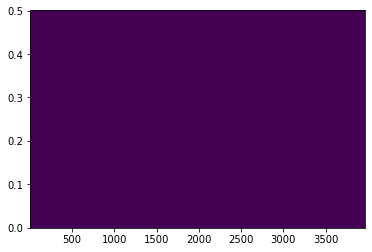

In [21]:
f, t, Sxx = spectrogram(signal2, noverlap=10, nperseg=1000)

plt.pcolormesh(t,f,Sxx)

plt.show()

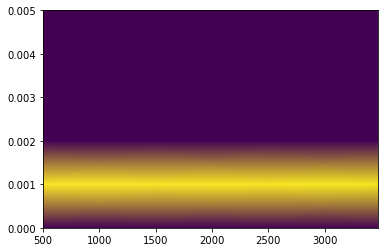

In [22]:
f, t, Sxx = spectrogram(signal2, noverlap=10, nperseg=1000)

plt.pcolormesh(t,f,Sxx, shading='gouraud')
plt.ylim([0,.005])

plt.show()

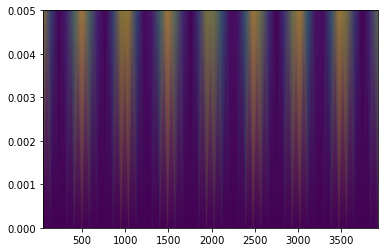

In [23]:
f, t, Sxx = spectrogram(signal2, noverlap=10, nperseg=100)

plt.pcolormesh(t,f,Sxx, shading='gouraud')
plt.ylim([0,.005])

plt.show()